# Exploring two variables 
by omar


#### for big datasets You will need to observe the relation between multiple variables , are they correlated ? are they linearly related ? 

## Plots For Multiple Variables : 
#### 1 - Scatter plot
#### 2 - Correlation Matrix
#### 3 - Hexagonal Binnning
#### 4 - Contour Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
The dataset contains features about a breast cancer like it's radius and its concavity , and the diagnosis is it malicious "خبيث" 
or is it Bengin "حميد"
'''
my_data=pd.read_csv("data.csv")
my_data=my_data.iloc[:,1:9] #we will use the first 5 features

#### From the following Matrix you can see that the features are highly correlated with eachother , this is not realistic but its for visualization purposes.

<AxesSubplot:>

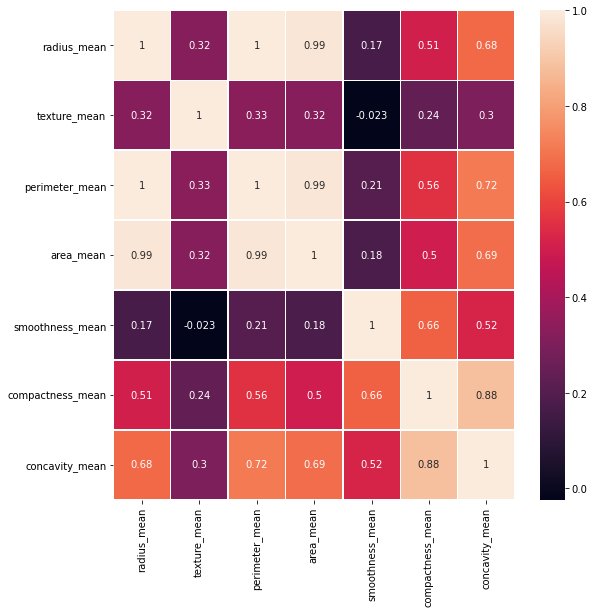

In [2]:
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(my_data.corr(), annot=True, linewidths=.5 , ax=ax) #annot=True shows the numbers on the plot

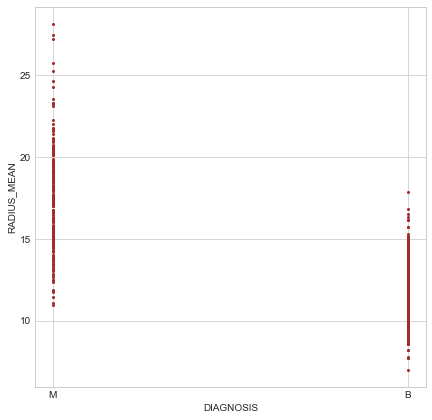

In [3]:
'''
Scatter Plot
'''
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(7,7))

plt.xlabel('DIAGNOSIS')
plt.ylabel('RADIUS_MEAN')

plt.plot(my_data['diagnosis'], my_data['radius_mean'],'o',markersize=2, color='brown')

#### From the previous plot you can see that if the radius of the cancer is less than 10 it's most likely to be bengin , and if it's larger there's higher probability that it's malicious

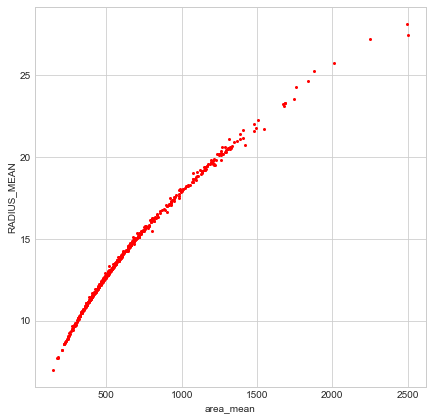

In [4]:
'''
Scatter plot for 2 numerical values
'''
plt.figure(figsize=(7,7))

plt.xlabel('area_mean')
plt.ylabel('RADIUS_MEAN')

plt.plot(my_data['area_mean'], my_data['radius_mean'],'o',markersize=2, color='red')

##### of course the previous plot is linear because if the radius is higher the area is going ot be higher.

## To Show all pairs fast you can use the scatter matrix.


In [5]:
import plotly.express as px
plt.figure(figsize=(15,15))
fig=px.scatter_matrix(my_data,dimensions=my_data.columns ,  color = my_data['diagnosis']) # colored by the diagnosis
fig.update_layout(title='Breast Cancer Data' , width=1000 , height=1000 )
fig.show()

<Figure size 1080x1080 with 0 Axes>

## Splitting Violin Plots for different categories
1- Use the x axis for a categorical variable and the y for the numerical to see the distribution for each category

2- Use a hue of your categories so it can split each violin by it "not shown here"

https://seaborn.pydata.org/generated/seaborn.violinplot.html

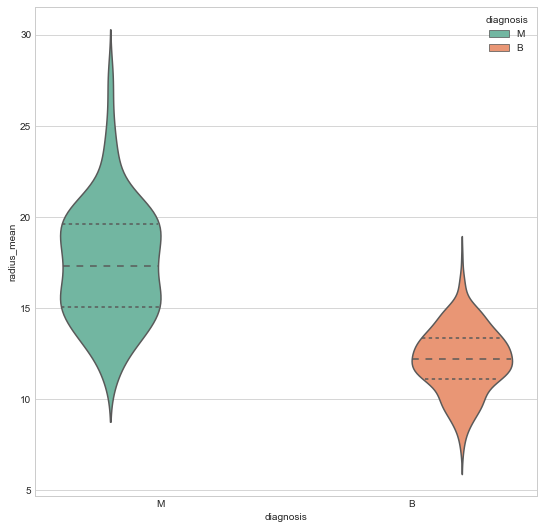

In [6]:
'''
here you can see for each category how the distribution is like
'''
plt.figure(figsize=(9,9))
ax = sns.violinplot(x="diagnosis", y="radius_mean", hue="diagnosis",
                    data=my_data, palette="Set2",
                    scale="count", inner="quartile")


#### Now you can see the quartiles and the median for each , and it's scaled by the amout of data in the category so you can see if the data is not balanced

# Hexagonal Binning 

#### Scatter plots are fine when the data is small , but if it's larger in size you will find it very dense and hard to interpret.


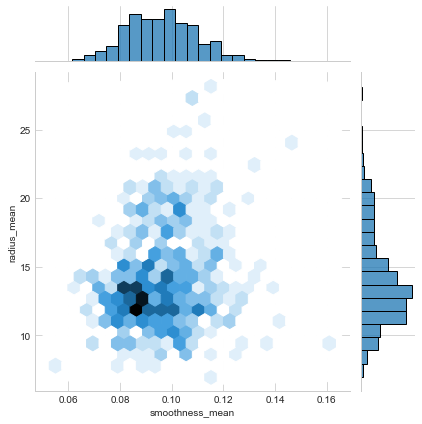

In [27]:
'''
The jointplot() functions have so many plots you can try , we will do some of them now.
kind='hex' is the hexagonal plot , as it's denser you will find the color darker
AND IT shows the distribution of each variable on top of it
'''
g=sns.jointplot(data=my_data , x='smoothness_mean' , y='radius_mean' , kind='hex' )

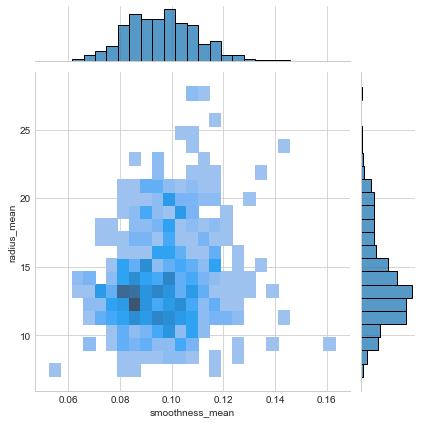

In [28]:
# 2d hist
g=sns.jointplot(data=my_data , x='smoothness_mean' , y='radius_mean' , kind='hist' )

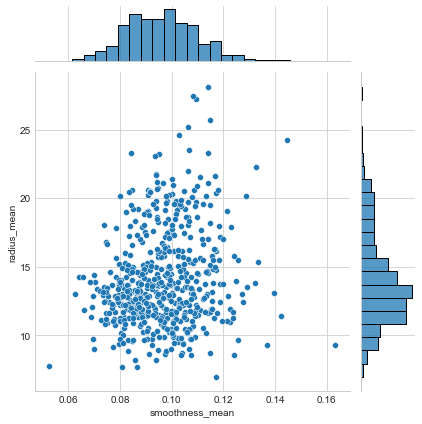

In [26]:
'''
Also can be used for scatter plots
'''
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data )

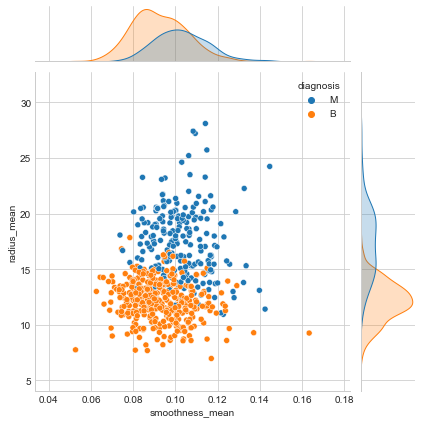

In [22]:
# To show for each category you can use the hue argument
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data  , hue='diagnosis')

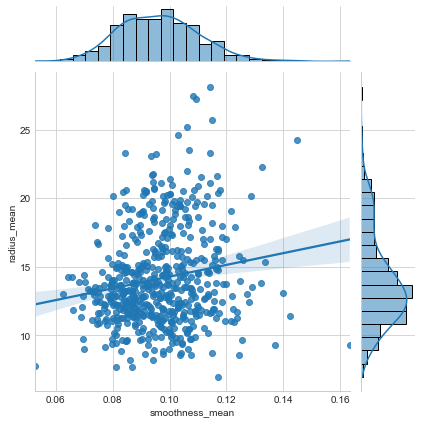

In [24]:
'''
It Also have a feature to show a best fitted line using regression 
and a density plot on top of the distribution
'''
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data , kind='reg')

# Kernel Density estimation "contour plots" 
#### The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a “peak.” 
#### Dense in the inside and the more you go outside the more it's less dense "outliers", often used for 3d viz
#### density if like the 3rd dimension for the two variables
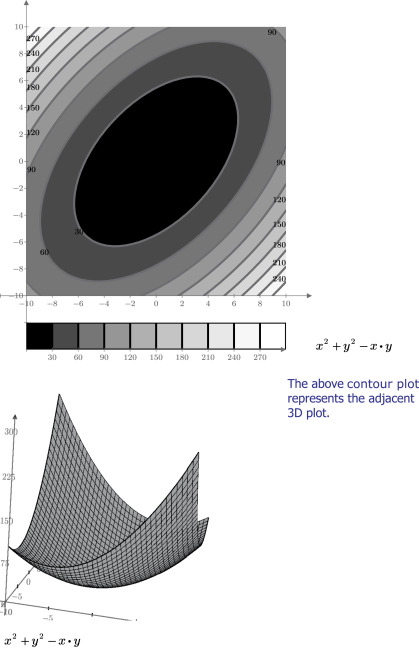

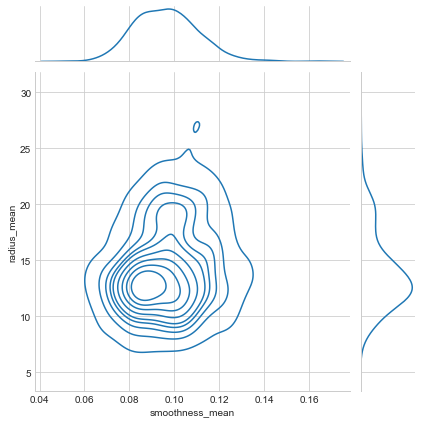

In [13]:
'''
it also has a kernel density estimation kind
'''
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data , kind='kde')

# The jointplot() function returns the grid , so if you want to make plots on top of each other you can save it then use plot_joint on it again.

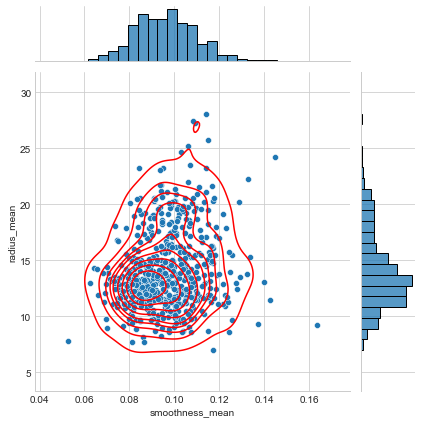

In [36]:
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data , kind='scatter')
g.plot_joint(sns.kdeplot, color="r")

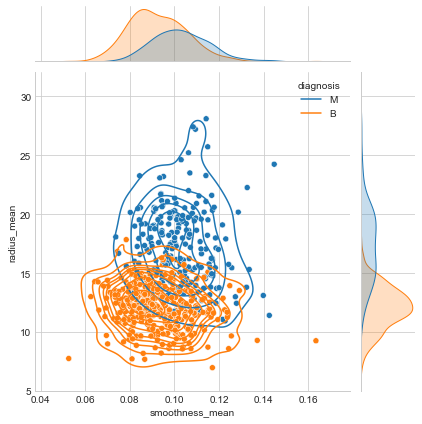

In [39]:
#you can still add the hue on top of them
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data , kind='scatter' , hue='diagnosis')
g.plot_joint(sns.kdeplot, color="r")

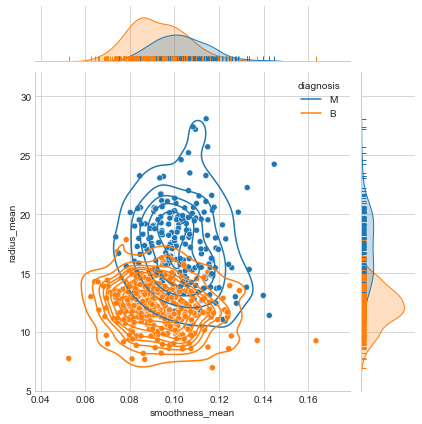

In [44]:
#YOU CAN ADD PLOTS ON THE DISTRIBUTION IN THE LEFT AND ON THE TOP using the plot_marginal
g=sns.jointplot(x='smoothness_mean' , y='radius_mean' , data=my_data , kind='scatter' , hue='diagnosis')
g.plot_joint(sns.kdeplot, color="r")
g.plot_marginals(sns.rugplot, color="r", height=0.1, clip_on=False) #rug plot shows the points on the distribution interval


### Notes : 1- for categorical vs numerical use box plots and violin plots
### 2- For numerical vs numerical use scatter if you just want to see the points , use hexagonals and contour plots if you want to see the density , use jointplot to give u an idea of best fitted regressor and the distribution.
### 3 - save the grids and plot on top of them to plot multiple plots 
### rugplot is showing the point on the distribution
### 4 - For 2 categorical variables use a contingency table , which is the count for each category centered around one category 

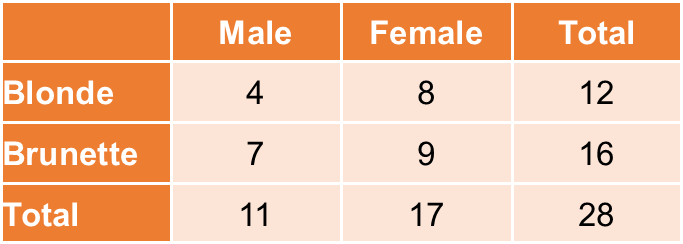

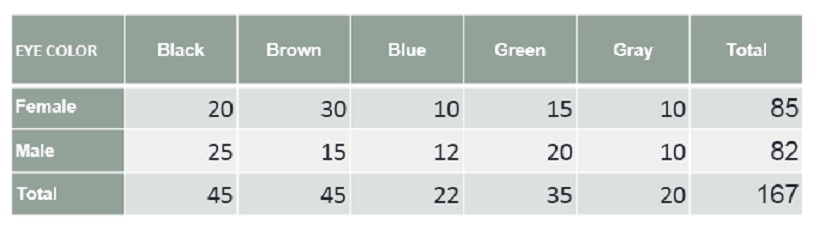

In [ ]:
# Thanks !

# Swarm Plot , Puts the data as single points , counts for each value
# can plot it on top of BoxPlot

In [4]:
my_data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  
0            0.11840           0.27760         0.30010  
1            0.08474           0.07864         0.08690  
2            0.10960           0.15990         0.19740  
3            0.14250           0.28390         0.24140  
4            0.10030           0.13280         0.19800  
..               ...               ...             ...  
564          0.11100           0.11590         0.24390  
565          0.09780           0.10340         0.14400  
566          0.08455           0.10230         0.09251  
567          0.11780           0.27700         0.35140  
568          0.05263           0.04362         0.00000  

[569 rows x 8 columns]

C:\Users\antoz\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

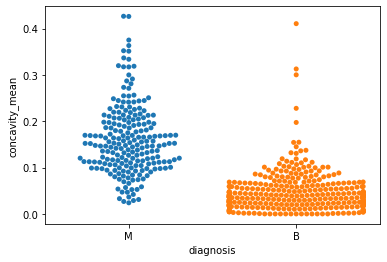

In [9]:
sns.swarmplot(x='diagnosis', y='concavity_mean', data=my_data)

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

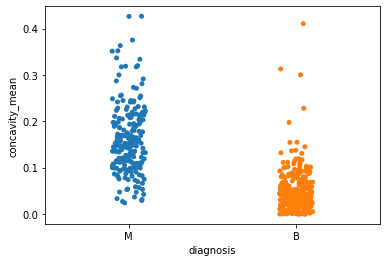

In [13]:
sns.stripplot(x='diagnosis', y='concavity_mean', data=my_data)

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

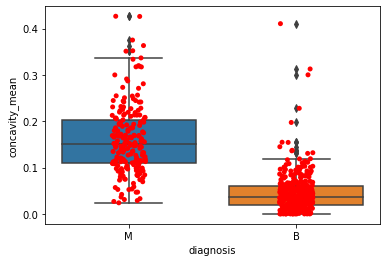

In [16]:
sns.boxplot(x='diagnosis', y='concavity_mean', data=my_data)
sns.stripplot(x='diagnosis', y='concavity_mean', data=my_data , color='red')

<AxesSubplot:xlabel='concavity_mean', ylabel='diagnosis'>

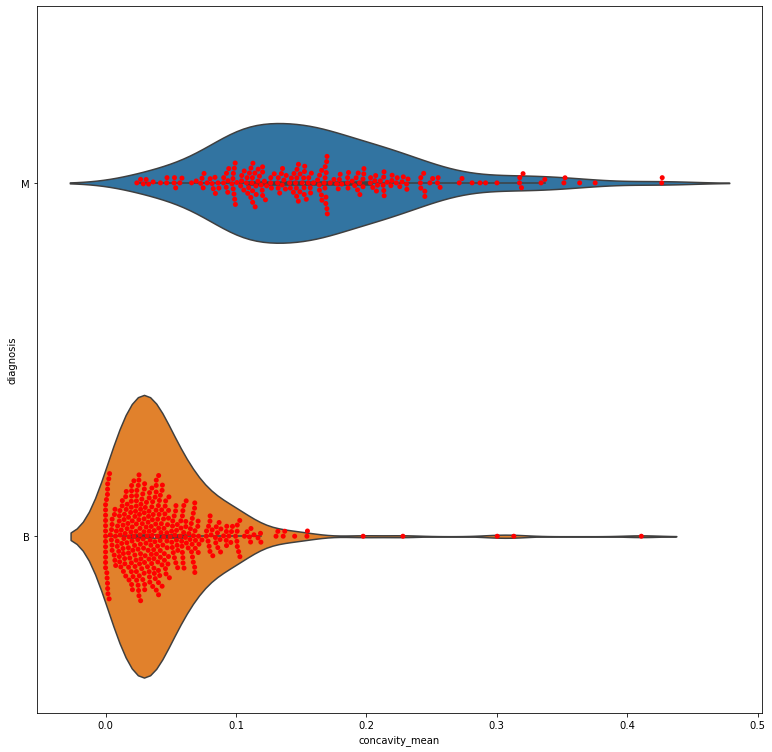

In [20]:
plt.figure(figsize=(13,13))
sns.violinplot(y='diagnosis', x='concavity_mean', data=my_data)
sns.swarmplot(y='diagnosis', x='concavity_mean', data=my_data , color='red')

# Ecdf

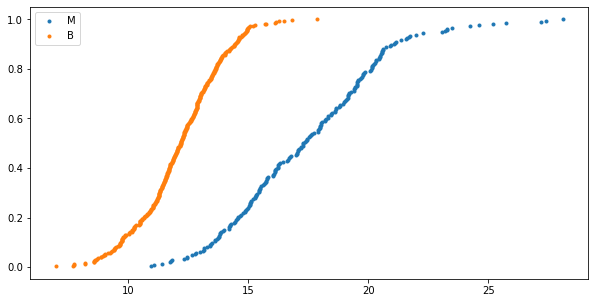

In [2]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

for CATEGORY in my_data.diagnosis.unique():
    x = np.sort(my_data['radius_mean'][my_data.diagnosis == CATEGORY])
    y = np.arange(1, len(x)+1) / len(x)
    ax.plot(x, y, marker='.', linestyle='none', label=CATEGORY)


plt.legend()

plt.show()